<a href="https://colab.research.google.com/github/melikeuckol/C-Movie-Marking-Form-Application-/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Proje: IMDb Film Yorumları Üzerinden Duygu Analizi (Sentiment Analysis)

# 1. loading needed libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



nltk.download('stopwords')
import csv

df = pd.read_csv(
    "IMDB Dataset.csv",
    engine='python',
    quoting=csv.QUOTE_NONE, # Alıntı işaretlerini yok say
    on_bad_lines='skip'
)
df.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the tim

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not text:
        return ''
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [ ]:

df['clean_review'] = df['review'].apply(clean_text)
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment,clean_review
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive,may become comfortable uncomfortable viewingth...
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,
"""Basically there's a family where a little boy (Jake) thinks ther

In [ ]:
# 4. return labels to numbers (positive -> 1, negative -> 0)
df['label'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment,clean_review,label
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive,may become comfortable uncomfortable viewingth...,1
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,,0
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,,0
"""Basically there's a family where a little boy (Jake)

In [ ]:
# 5.vectorizing with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['label']

In [ ]:
# splitting test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# recognizing models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC()
}


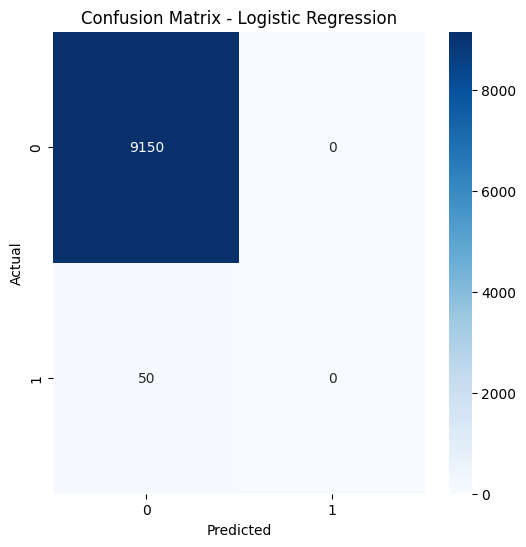

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9150
           1       0.00      0.00      0.00        50

    accuracy                           0.99      9200
   macro avg       0.50      0.50      0.50      9200
weighted avg       0.99      0.99      0.99      9200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


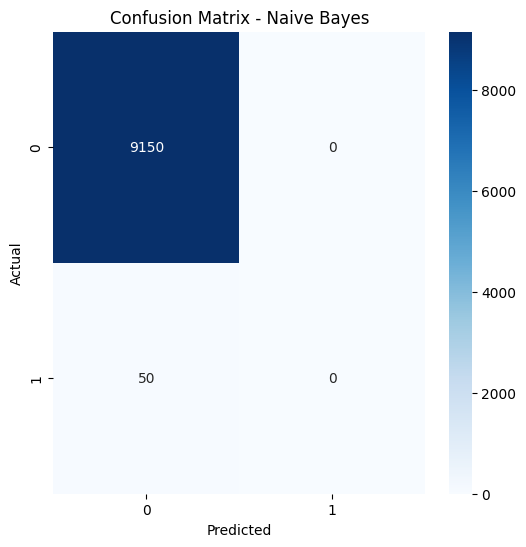

Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9150
           1       0.00      0.00      0.00        50

    accuracy                           0.99      9200
   macro avg       0.50      0.50      0.50      9200
weighted avg       0.99      0.99      0.99      9200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


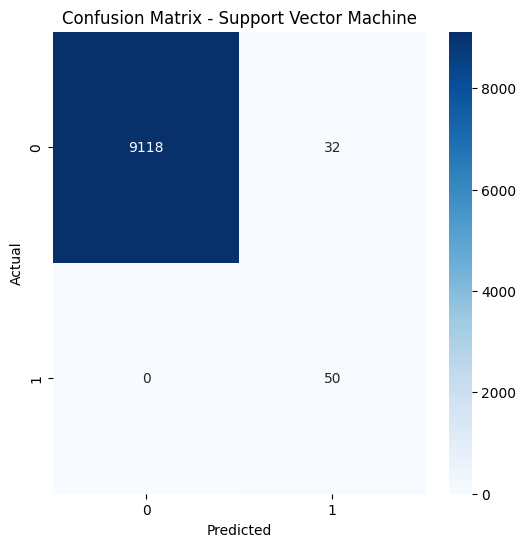

Classification Report for Support Vector Machine:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9150
           1       0.61      1.00      0.76        50

    accuracy                           1.00      9200
   macro avg       0.80      1.00      0.88      9200
weighted avg       1.00      1.00      1.00      9200



In [ ]:
# 8. comparing models
results = {}

for model_name, model in models.items():
    # 8.1 train the model
    model.fit(X_train, y_train)
    # 8.2 estimating
    y_pred = model.predict(X_test)
    # 8.3 record the accuracy score
    results[model_name] = accuracy_score(y_test, y_pred)
    # 8.4 confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    # 8.5 classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

<ipython-input-26-1ba23c227474>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


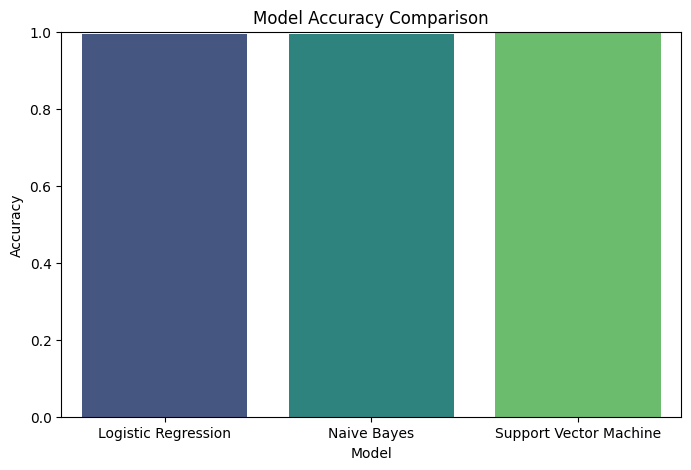

In [ ]:
# 9. comparing accuracy
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# 10. select the best model and show details
best = max(results, key=results.get)
print(f"En iyi model: {best} ({results[best]:.4f} accuracy)\n")
best_model = models[best]
y_best = best_model.predict(X_test)

En iyi model: Support Vector Machine (0.9965 accuracy)



In [ ]:
print("Best Model Classification Report:\n")
print(classification_report(y_test, y_best))

Best Model Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9150
           1       0.61      1.00      0.76        50

    accuracy                           1.00      9200
   macro avg       0.80      1.00      0.88      9200
weighted avg       1.00      1.00      1.00      9200



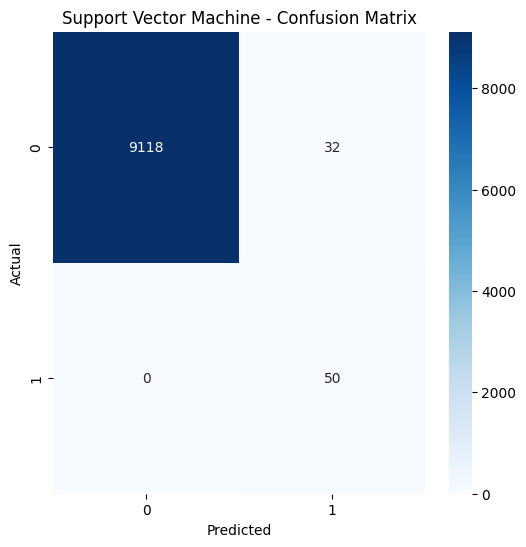

In [ ]:
cm_best = confusion_matrix(y_test, y_best)
plt.figure(figsize=(6,6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title(f"{best} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()